# 8 | Agglomerative Clustering

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.decomposition import PCA

## Creating dataframe

In [2]:
df = pd.read_csv("aggl.csv")
x=df.iloc[:,[3,4]].values
X = pd.read_csv("credit.csv")

## Plotting a dendrogram 

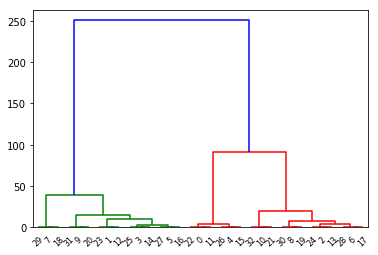

In [3]:
dend = sch.dendrogram(sch.linkage(x,method='ward'))

## Clustering Model

In [4]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')       # Ward strategy
model.fit(x)
labels=model.labels_

In [5]:
labels

array([2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4, 2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4,
       2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4], dtype=int64)

## Credit card data preprocessing

In [6]:
X.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
X = X.drop('CUST_ID', axis=1)
X.fillna(method='ffill',inplace=True)

In [8]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_normalized=normalize(X_scaled)

X_normalized=pd.DataFrame(X_normalized)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
pca=PCA(n_components=2)

X_principal=pca.fit_transform(X_normalized)
X_principal=pd.DataFrame(X_principal)
X_principal.columns=['P1','P2']

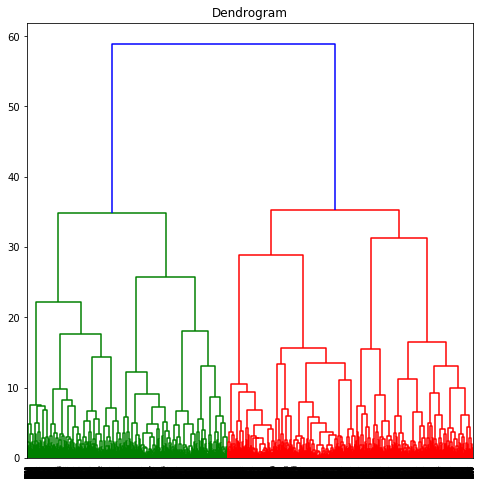

In [10]:
plt.figure(figsize=(8,8))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(X_normalized,method='ward'))  #actual data

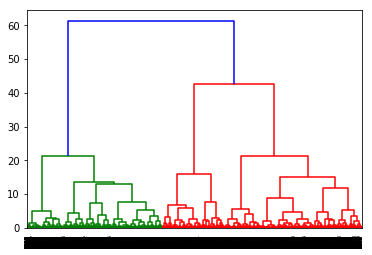

In [11]:
dend = sch.dendrogram(sch.linkage(X_principal,method='ward'))     #PCA reduced data 

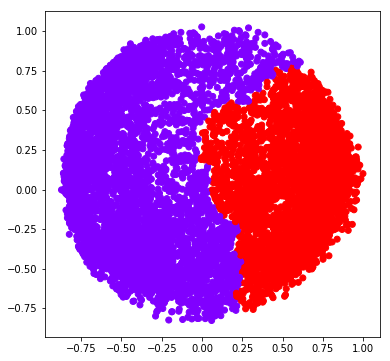

In [12]:
ac2=AgglomerativeClustering(n_clusters=2)
plt.figure(figsize=(6,6))
plt.scatter(X_principal['P1'], X_principal['P2'], c=ac2.fit_predict(X_principal), cmap='rainbow')
plt.show()

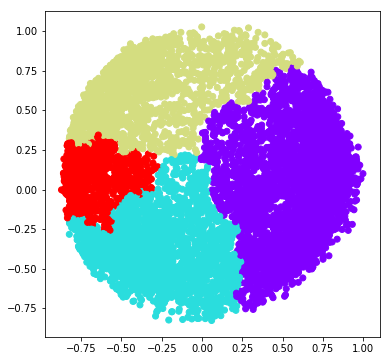

In [13]:
ac2=AgglomerativeClustering(n_clusters=4)
plt.figure(figsize=(6,6))
plt.scatter(X_principal['P1'], X_principal['P2'], c=ac2.fit_predict(X_principal), cmap='rainbow')
plt.show()

In [14]:
labels=ac2.labels_
labels                 #labels for each data point

array([1, 2, 0, ..., 1, 1, 1], dtype=int64)

In [15]:
set(labels)            #cluster number and cluster labels

{0, 1, 2, 3}